In [1]:
from gradients import *

In [2]:
subjects = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
17, 18, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30,
31, 33, 35, 36, 38, 39, 40, 42, 43, 44, 45, 46, ]
# excluded subjects: 41, 19, 32, 27, 34, 37

In [3]:
n_components = 4

grads = [{'rs': {}, 'baseline': {}, 'lrn': {}, 'lrn_early': {}, 'lrn_late': {}} for _ in range(n_components)]

## reference is individual's rest data

In [4]:
for s in subjects:
    data_rs = load_data(subj=s, cond='rest')
    surf_labels, mask_removed = load_atlas(data_rs)
    gm = make_gradients(subj=s)

    for i in range(n_components):
        grad_rs = gm.aligned_[0][:, i]
        grads[i]['rs'][s] = grad_rs
        grad_baseline = gm.aligned_[1][:, i]
        grads[i]['baseline'][s] = grad_baseline
        grad_lrn = gm.aligned_[2][:, i]
        grads[i]['lrn'][s] = grad_lrn
        grad_lrn_early = gm.aligned_[3][:, i]
        grads[i]['lrn_early'][s] = grad_lrn_early
        grad_lrn_late = gm.aligned_[4][:, i]
        grads[i]['lrn_late'][s] = grad_lrn_late

# try a global reference

In [4]:
data_rs = load_data(subj=1, cond='rest')
# just took a subj to make atlas
surf_labels, mask_removed = load_atlas(data_rs)
# make average corr_mat
global_corr_mat_rest = np.zeros((998, 998))
for s in subjects:
    data_rs = load_data(subj=s, cond='rest')
    global_corr_mat_rest += make_mat(data_rs)
global_corr_mat_rest /= len(subjects)
# make the global gradient model
DIM_RED_APPROACH = 'dm'
global_gm_ref = GradientMaps(random_state=0, approach=DIM_RED_APPROACH)
global_gm_ref.fit(global_corr_mat_rest, sparsity=0.9)

GradientMaps(random_state=0)

In [5]:
for s in subjects:
    gm = make_gradients(subj=s, gm_ref=global_gm_ref)
    for i in range(n_components):
        grad_rs = gm.aligned_[0][:, i]
        grads[i]['rs'][s] = grad_rs
        grad_baseline = gm.aligned_[1][:, i]
        grads[i]['baseline'][s] = grad_baseline
        grad_lrn = gm.aligned_[2][:, i]
        grads[i]['lrn'][s] = grad_lrn
        grad_lrn_early = gm.aligned_[3][:, i]
        grads[i]['lrn_early'][s] = grad_lrn_early
        grad_lrn_late = gm.aligned_[4][:, i]
        grads[i]['lrn_late'][s] = grad_lrn_late

In [6]:
mean_grads = [{} for _ in range(n_components)]

In [7]:
for i in range(n_components):
    mean_grads[i]['rs'] = np.mean([v for k, v in grads[i]['rs'].items()], axis=0)
    mean_grads[i]['baseline'] = np.mean([v for k, v in grads[i]['baseline'].items()], axis=0)
    mean_grads[i]['lrn'] = np.mean([v for k, v in grads[i]['lrn'].items()], axis=0)
    mean_grads[i]['lrn_early'] = np.mean([v for k, v in grads[i]['lrn_early'].items()], axis=0)
    mean_grads[i]['lrn_late'] = np.mean([v for k, v in grads[i]['lrn_late'].items()], axis=0)

---

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

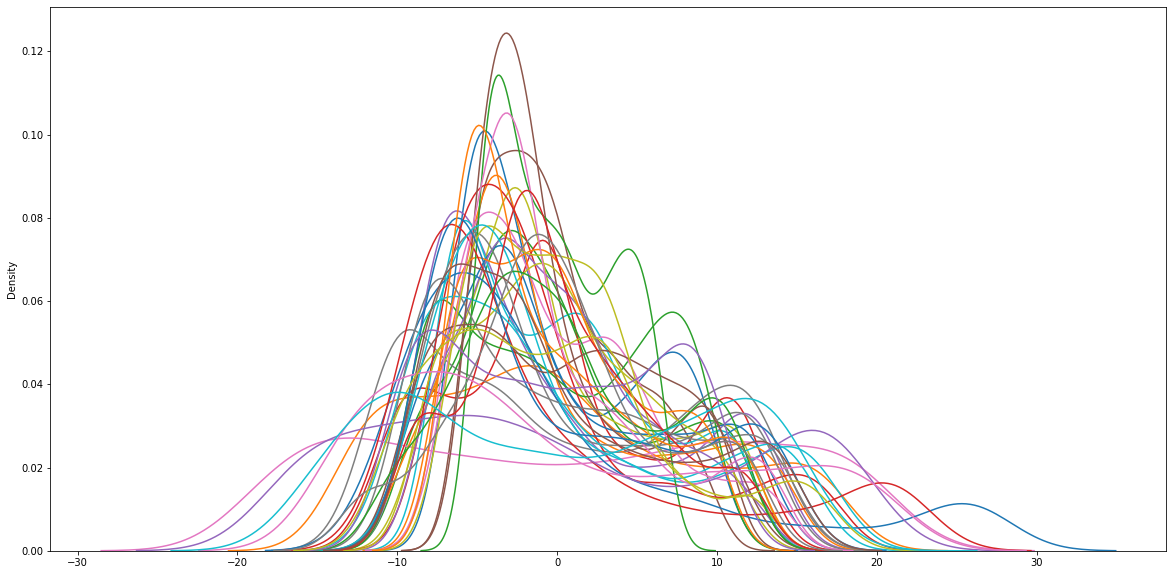

In [48]:
# 12
plt.figure(figsize=(20, 10))
for s in subjects:
    sns.distplot(grads[0]['rs'][s], hist=False)
plt.show()

## compare for a subject
with individual reference

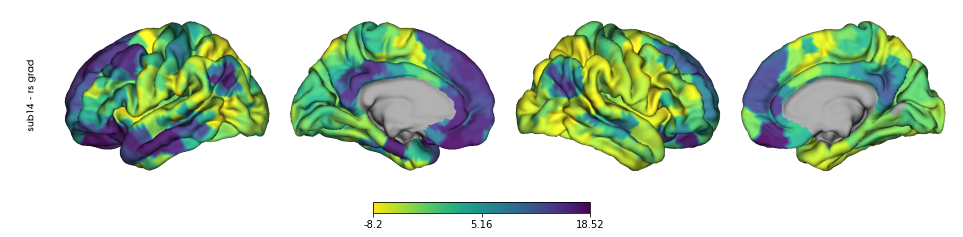

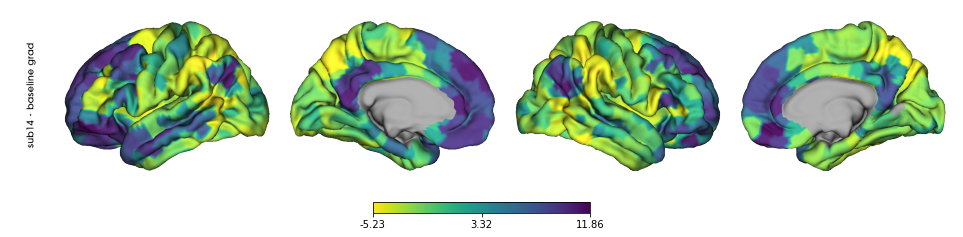

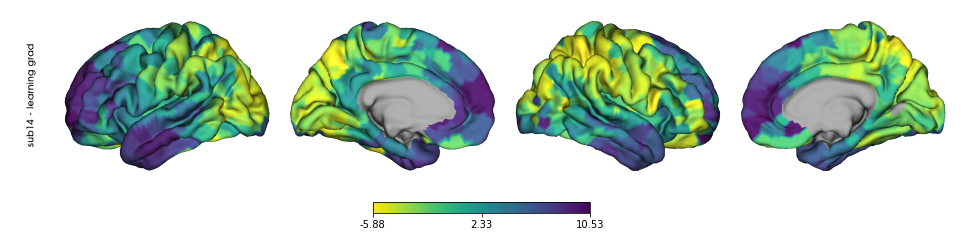

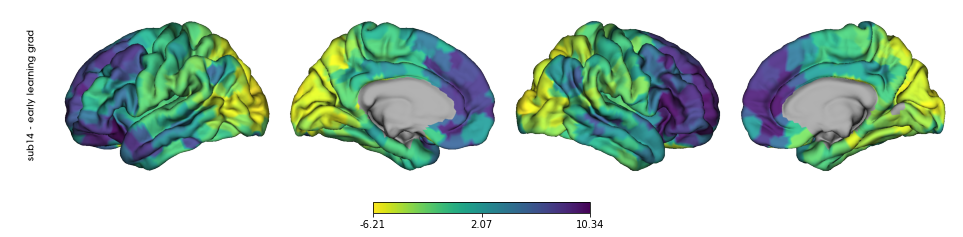

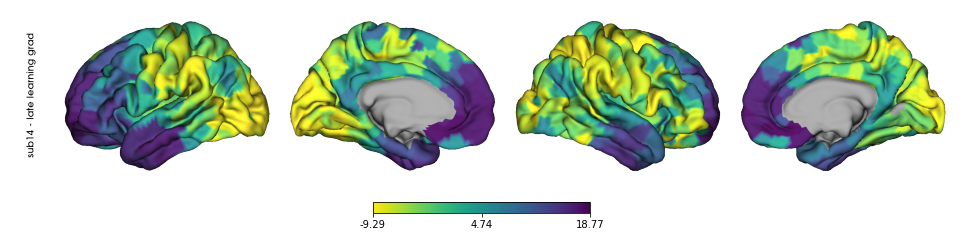

In [26]:
for s in [14]:
    data_rs = load_data(subj=s, cond='rest')
    surf_labels, mask_removed = load_atlas(data_rs)
    gm = make_gradients(subj=s)
    plot_gradients(s, gm, surf_labels, mask_removed)

with global reference

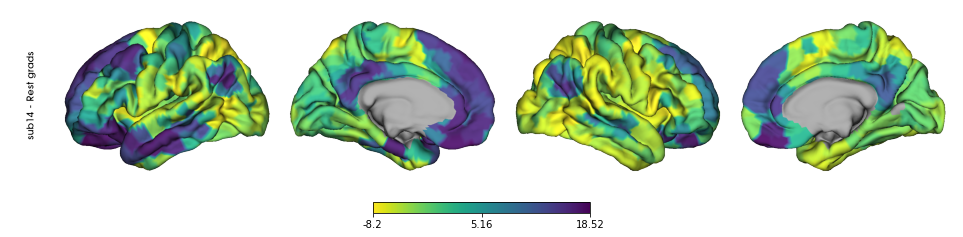

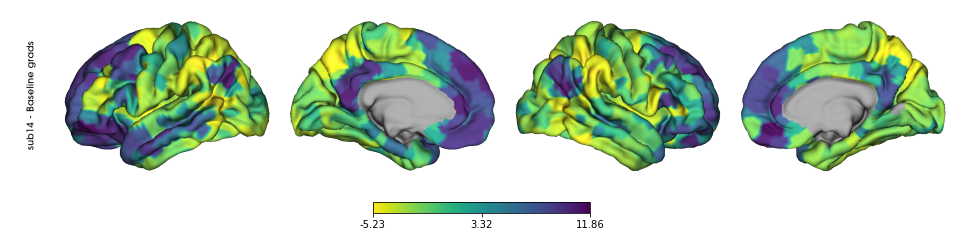

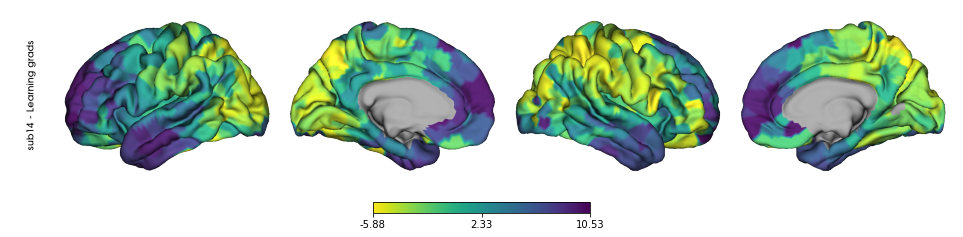

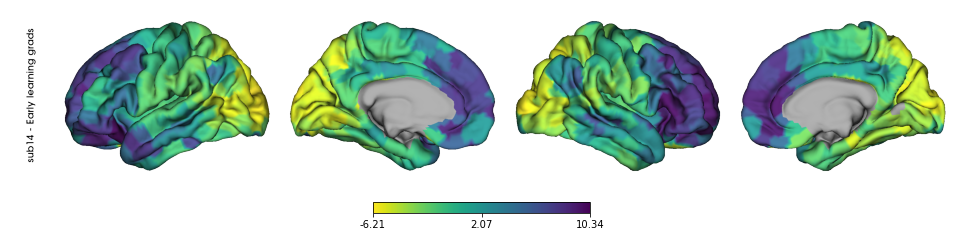

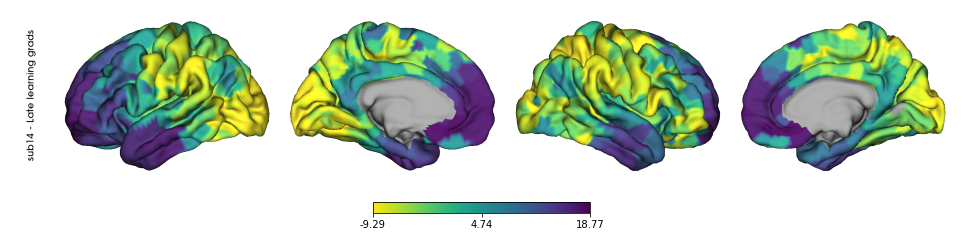

In [8]:
for s in [14]:
    data_rs = load_data(subj=s, cond='rest')
    surf_labels, mask_removed = load_atlas(data_rs)
    gm = make_gradients(subj=s)
    plot_gradients(s, gm, surf_labels, mask_removed)

---

# gradients (all global referenced in this commit)


In [10]:
def get_gradient_component(component_num=1):
    component_num -= 1
    grad_aligned_rs = map_to_labels(mean_grads[component_num]['rs'], surf_labels, mask=mask_removed, fill=np.nan)
    grad_aligned_baseline = map_to_labels(mean_grads[component_num]['baseline'], surf_labels, mask=mask_removed, fill=np.nan)
    grad_aligned_lrn = map_to_labels(mean_grads[component_num]['lrn'], surf_labels, mask=mask_removed, fill=np.nan)
    grad_aligned_lrn_early = map_to_labels(mean_grads[component_num]['lrn_early'], surf_labels, mask=mask_removed, fill=np.nan)
    grad_aligned_lrn_late = map_to_labels(mean_grads[component_num]['lrn_late'], surf_labels, mask=mask_removed, fill=np.nan)

    data = [grad_aligned_rs, grad_aligned_baseline, grad_aligned_lrn, grad_aligned_lrn_early, grad_aligned_lrn_late]
    texts = ['rs grad', 'baseline grad', 'learning grad', 'early learning grad', 'late learning grad']
    color_maps = ['viridis_r', 'viridis_r', 'viridis_r', 'viridis_r', 'viridis_r']
    z = zip(data, texts, color_maps)

    component_num += 1
    for data_to_show, text_bar, color_map in z:
        stack_surfplot(data_to_show, 'gradient ' + str(component_num) + ' - ' + text_bar, color_map)

## gradient 1

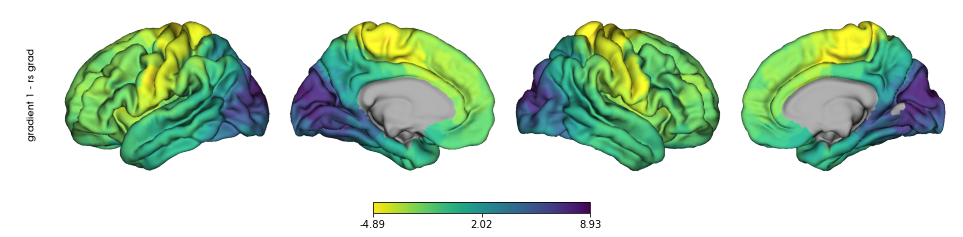

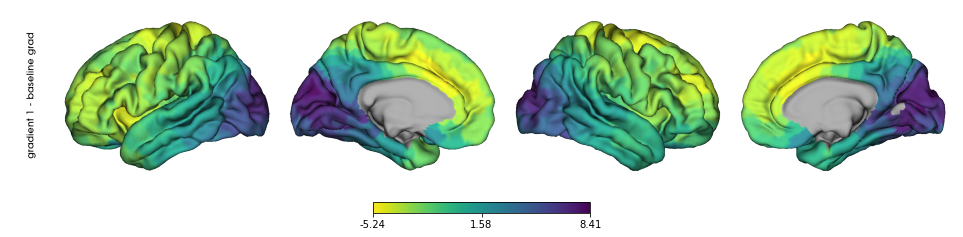

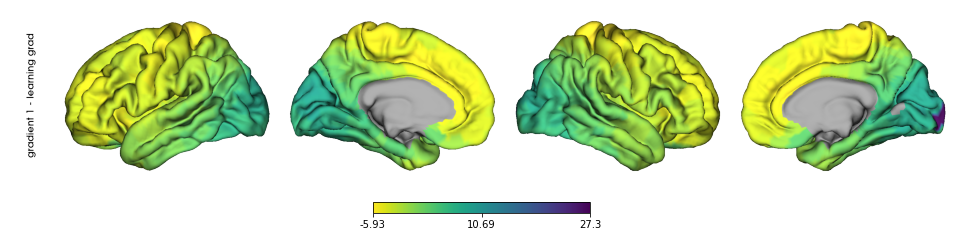

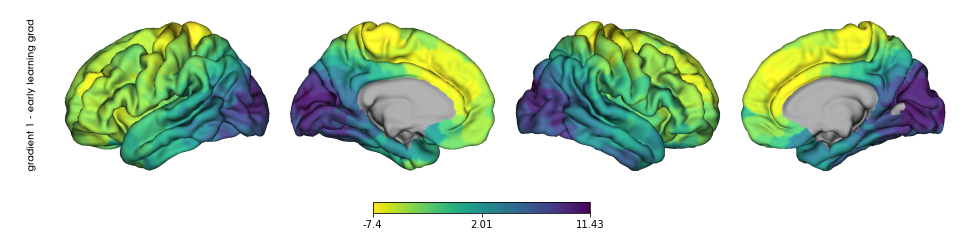

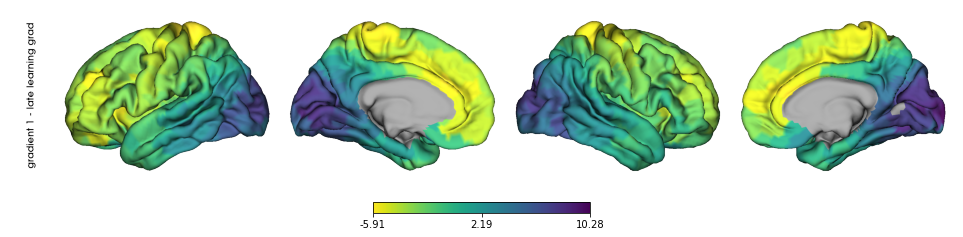

In [11]:
get_gradient_component(component_num=1)
# component_num=0 denotes index -1 which is last (4th) component

## gradient 2

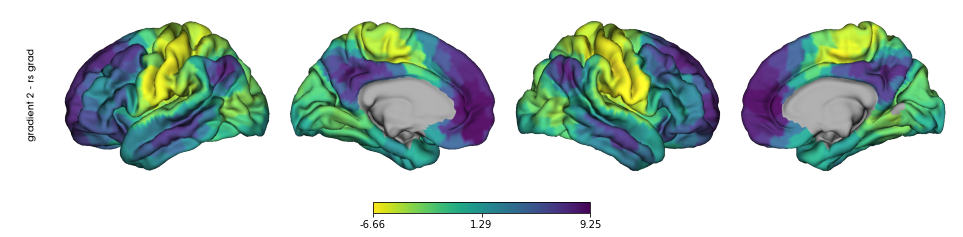

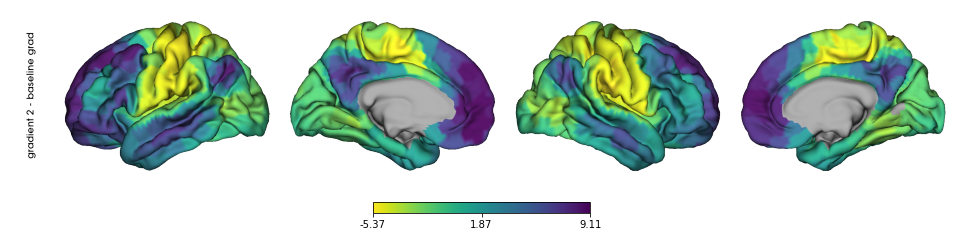

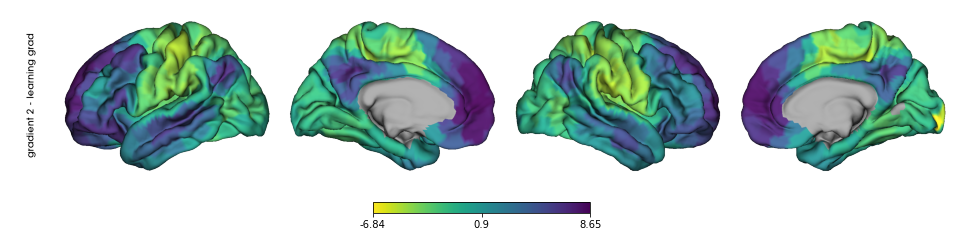

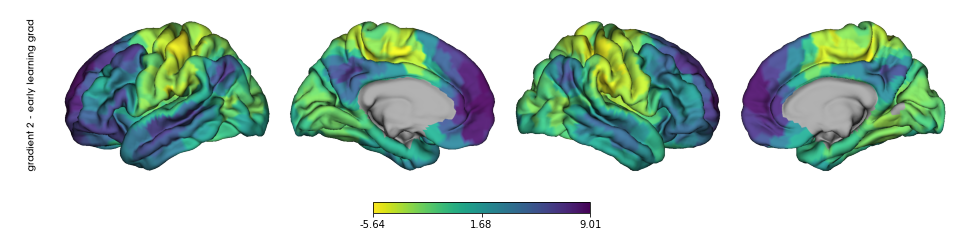

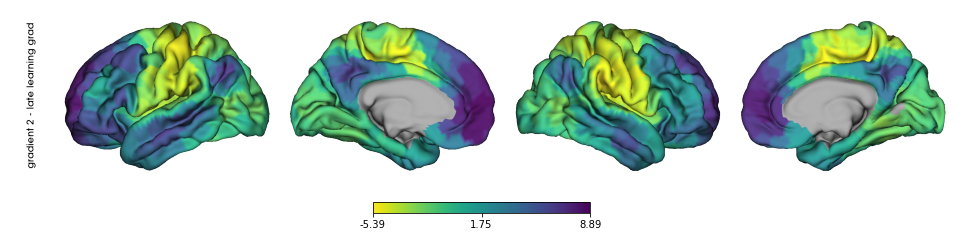

In [12]:
get_gradient_component(component_num=2)

## gradient 3

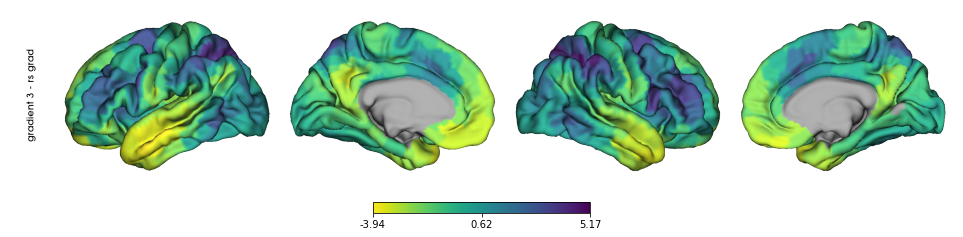

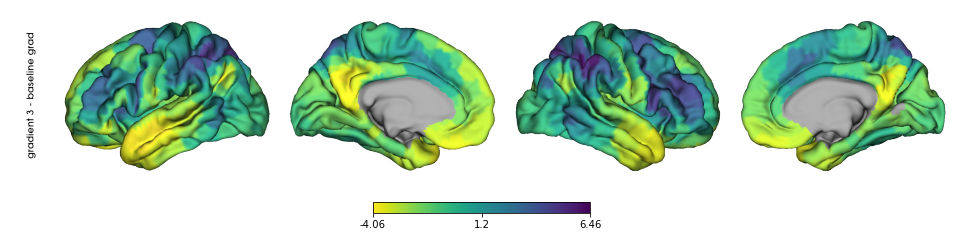

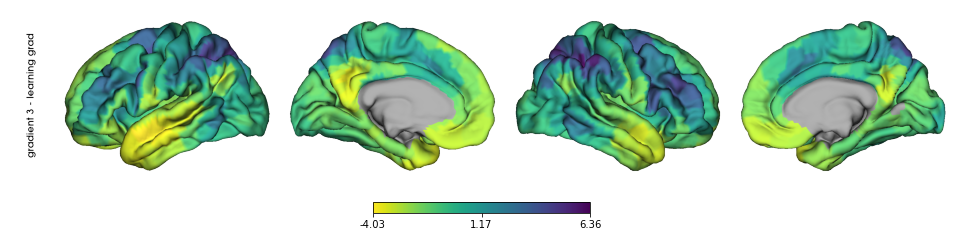

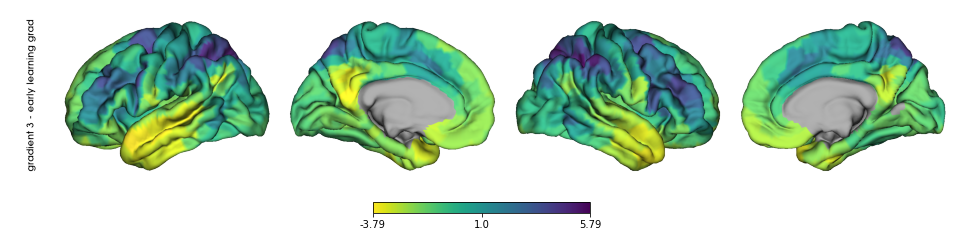

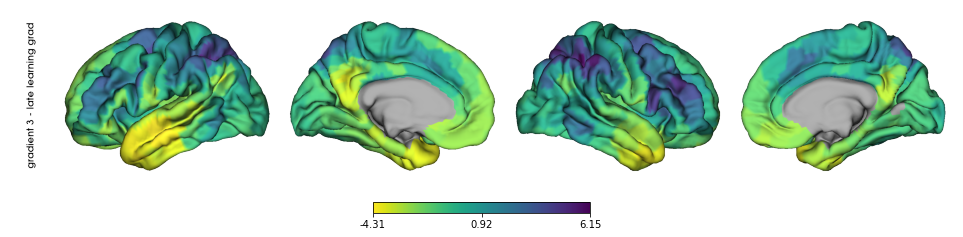

In [13]:
get_gradient_component(component_num=3)

## gradient 4

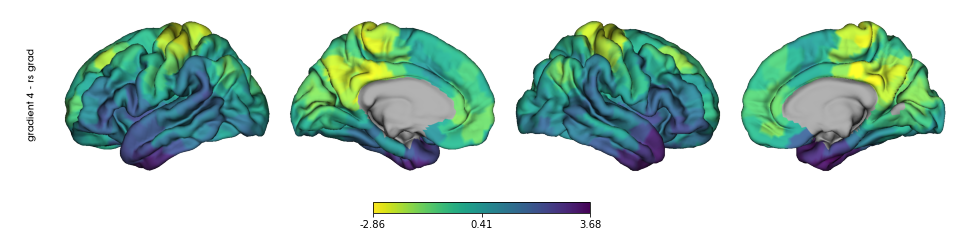

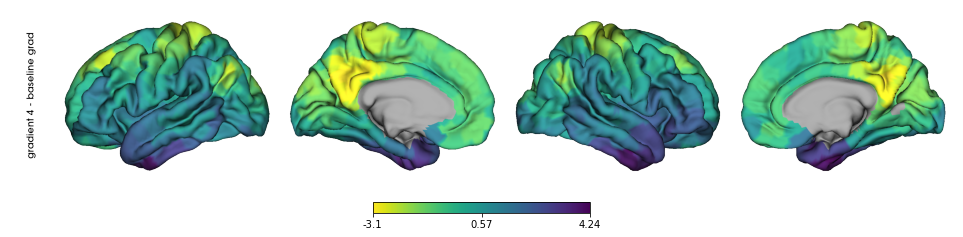

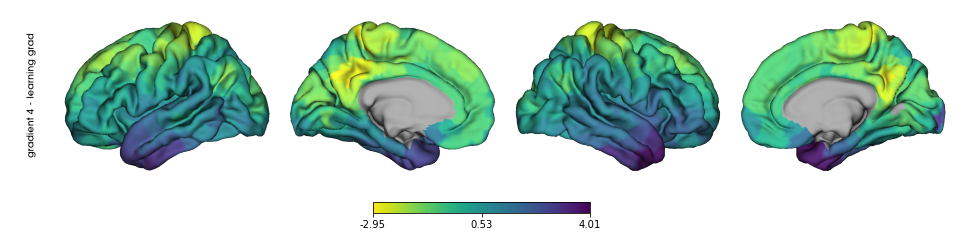

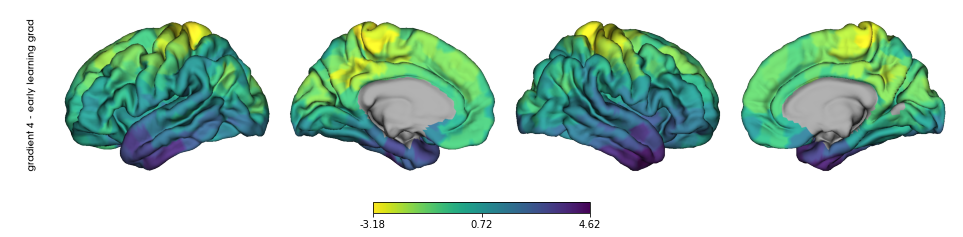

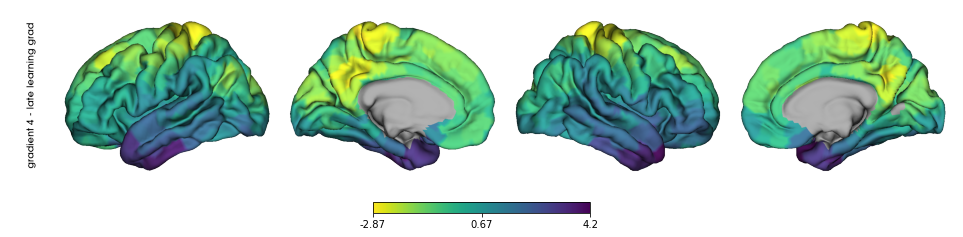

In [14]:
get_gradient_component(component_num=4)

# adding up first 3 components (eccentricity)

Context leak detected, msgtracer returned -1


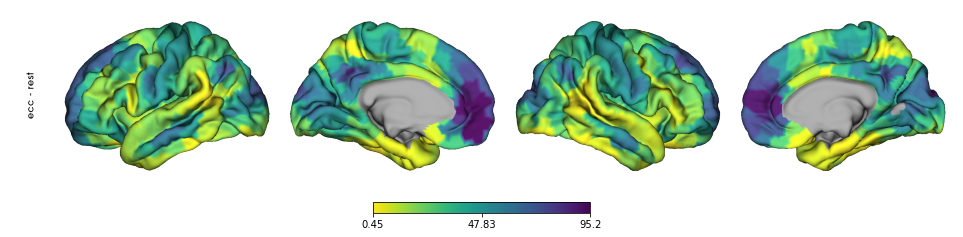

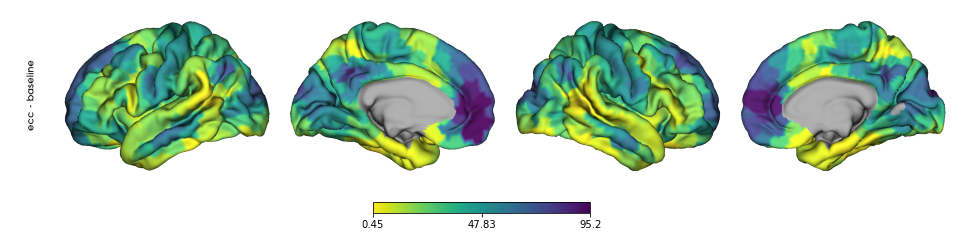

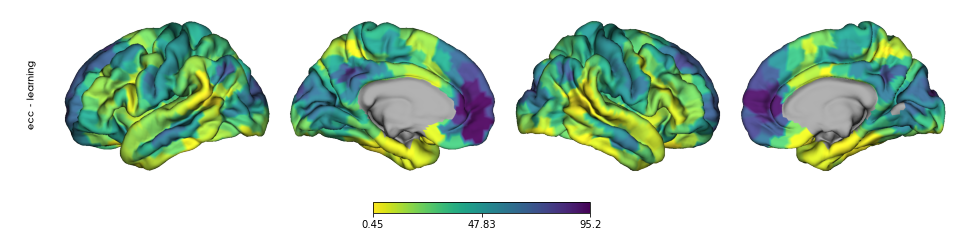

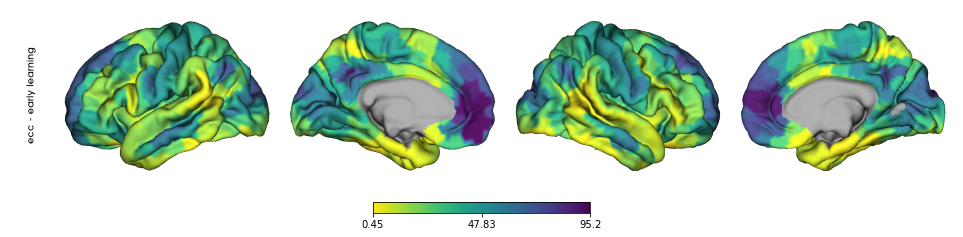

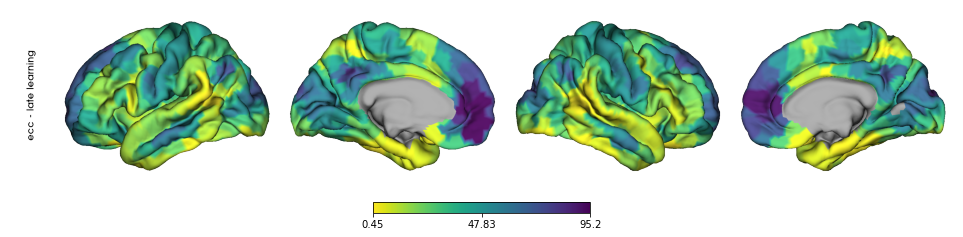

In [27]:
ecc = {k: np.zeros((998,)) for k in ['rs', 'baseline', 'lrn', 'lrn_early', 'lrn_late']}

for component_num in range(3):
    for k in ecc.keys():
        ecc[k] += mean_grads[component_num]['rs'] ** 2

grad_aligned_rs = map_to_labels(ecc['rs'], surf_labels, mask=mask_removed, fill=np.nan)
grad_aligned_baseline = map_to_labels(ecc['baseline'], surf_labels, mask=mask_removed, fill=np.nan)
grad_aligned_lrn = map_to_labels(ecc['lrn'], surf_labels, mask=mask_removed, fill=np.nan)
grad_aligned_lrn_early = map_to_labels(ecc['lrn_early'], surf_labels, mask=mask_removed, fill=np.nan)
grad_aligned_lrn_late = map_to_labels(ecc['lrn_late'], surf_labels, mask=mask_removed, fill=np.nan)

data = [grad_aligned_rs, grad_aligned_baseline, grad_aligned_lrn, grad_aligned_lrn_early, grad_aligned_lrn_late]
texts = ['rest', 'baseline', 'learning', 'early learning', 'late learning']
color_maps = ['viridis_r', 'viridis_r', 'viridis_r', 'viridis_r', 'viridis_r']
z = zip(data, texts, color_maps)

for data_to_show, text_bar, color_map in z:
    stack_surfplot(data_to_show, 'ecc' + ' - ' + text_bar, color_map)